# Week 7 Lab - Basic Roadmap for Machine Learning

Now that we have finished the preprocessing part of the course, we can begin the discussion of how to extract meaningful and insightful patterns within datasets. Recall, by this point we should be able to load a dataset, explore its summary statistics and basic properties through visualisation, and clean up the data by removing/replacing missing values, combining data sets, handling noise etc. With all this done, the purpose of this lab sheet is to briefly discuss the general approach to applying machine learning algorithms to the chosen dataset. In a separate lab sheet we will actually start extracting patterns by means of linear regression.

For the coming weeks, a lot of what we will do will include the _Scikit Learn_ package. This is a popular maching learning package and has a lot of in-built algorithms, such as the linear regression algorithm, `LinearRegression`, which we will see this week.

## Basic Structure of Using Scikit Learn

- __Step 1__ Import the model: In general, this takes the form, `from sklearn.family import Model`. Here, `.family` represents the family to which the specific algorithm belongs, and `Model` is the algorithm itself. So, for example we could type, `from sklearn.linear_model import LinearRegression` to import the linear regression algorithm from the `linear_model` family of algorithms.
- __Step 2__ Instantiate the model: When doing this we can set all the parameters of the estimator (or model). This will directly affect how the algorithm runs and we should remind ourselves that in Jupyter, we can use Shift+Tab to see all the possible parameters. For example, suppose we want to instantiate a linear regression model in which the coefficients are forced to be positive. In this case, we would pass the following: `model = LinearRegression(positive=True)`. Other parameters in this example include `fit_intercept` which determines whether or not to calculate the intercept for this model, `copy_X` which, as expected determines whether or not to overwrite X, and `n_jobs` which determines the number of jobs to use for the computation. For more information on this model, see

    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

    More information on all the algorithms Scikit Learn offers can be found here: https://scikit-learn.org/stable/
- __Step 3a__ Fit the model onto some data. As will be discussed (perhaps it already has), we should split this data into a training set and a test set. Let's see an example of how to do this.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Create some data, here X will be the features and y the labels
X, y = np.arange(20).reshape((10,2)), range(10)

In [3]:
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [4]:
list(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [6]:
X_train

array([[18, 19],
       [12, 13],
       [16, 17],
       [14, 15],
       [ 2,  3],
       [ 6,  7],
       [10, 11]])

In [7]:
y_train

[9, 6, 8, 7, 1, 3, 5]

In [8]:
X_test

array([[4, 5],
       [0, 1],
       [8, 9]])

In [9]:
y_test

[2, 0, 4]

- __Step 3b__ Train/fit our model onto the training data. To do this, we use the `.fit()` method. So, for our training data we would pass, `model.fit(X_train,y_train)`.
- __Step 4__ Use our model to predict labels/values on the test set. This time we use the `.predict()` method, i.e. pass `predictions = model.predict(X_test)`.

__N.B.__ The above is suitable for a supervised learning case (we had labels). While the case for unsupervised is different, it uses the same idea. For instance, `model.fit(X)` instead of `model.fit(X,y)`, and so forth.

- __Step 5__ Evaluate our model by comparing predictions to the correct values. Which evaluation model use use depends upon what sort of prediction model we are using, e.g. regression/classification. While we will discuss this in greater detail during the lectures, it might be worth briefly discussing here.
- __Step 5a__ Evaluation methods for classification. This is not meant to be exhaustive, but simply a short note which complements the main lecture notes. We will briefly discuss four key classification metrics:
        - Accuracy
        - Recall
        - Precision
        - F1-score

    The basic idea of the above boils down to the simple observation that our classification model has spit out some predictions which can be correct or incorrect (and to test this we _know_ the actual answer). We therefore want to quantify how correct our algorithm is so that we can meaningfully interpret its usefulness. For simplicity, we will assume we have a binary classification, i.e. we only have two possible labels 0 or 1. This could be a medical test (positive/negative), sex (male/female), smoker (yes/no) etc.

## Accuracy

This is the simplest way to quantify the accuracy of our model. Our model has spit out a bunch of answers based upon a test input which we can compare against our known test answers. We do this for all test inputs so that we can count all incorrect matches. We can therefore calculate accuracy as follows:

$$
accuracy = \frac{\text{number of correct predictions}}{\text{total number of prections}}.
$$

__Problem:__ Not all incorrect matches hold equal value!

For instance, suppose our test input has 100 entries and of those 100 entries, 99 have label 0 and one has label 1 (this situation is often called _unbalanced_). Then suppose our model always guessed 0, regardless of the input. This would not be a good classification model in general, but in this case it has an accuracy of 99%.

## Recall

This brings us to the recall model evaluation method. This calculates the ability of our classification model to find all the relevant cases within a dataset and is defined as follows:

$$
recall = \frac{\text{number of true positives}}{\text{number of true positives }+\text{ number of false negatives}}.
$$

By true positive and false negative, we mean the following:

- true positive $=$ label is true and prediction is true;
- false positive $=$ label is false but prediction is true;
- false negative $=$ label is true but prediction is false.

## Precision

Alternatively, we could use precision to evaluate our model. This calculates the ability of our classification model to identify only the relevant data points and is defined as follows:

$$
precision = \frac{\text{number of true positives}}{\text{number of true positives }+\text{ number of false positives}}.
$$

## Recall v Precision

Roughly, recall expresses the ability to find all relevant instances in a dataset, whereas precision expresses the proportion of the data points our model says was relevant that were actually relevant.

## F1-Score

At times, we do not want to compute either recall or precision. Instead, we want to find an optimal blend of the two and this is what we call the F1-score

$$
F_1 = 2\times\frac{precision\times recall}{precision + recall}.
$$

This is actually the harmonic mean of precision and recall, where harmonic mean is the third of the Pythagoream means (other two being arithmetic and geometric) defined as follows:

$$
\text{harmonic mean} = \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\cdots+\frac{1}{x_n}}.
$$

__Exercise:__ Show that the $F_1$ is actually the harmonic mean of precision and recall.

## Why F1-Score?

The benefit of using the harmonic mean (as opposed to the arithmetic mean, say) is that it punishes extreme values. It is simply the reciprocal of the arithmetic mean of the reciprocals, and as such large numbers become much smaller in the denominator. Likewise, very small numbers become large when taking the reciprocal, but then we divide n by a large number which again becomes small. It is therefore very good when working with values which are fractions (such as recall/precision). We now consider some extreme cases:

- $precision = 1$ and $recall=0$. Then $F_1=0$.
- $precision = 0$ and $recall=1$. Then $F_1=0$.
- $precision = 0.5$ and $recall=0.5$. Then $F_1=0.5$.

__Exercise:__ Compare these to the arithmetic/geometric means.

- __Step 5b__ Evaluation methods for regression. Recall, in this case we are trying to predict continuous values (as opposed to categorical values as in classification). This means the above metrics are unsuitable and so we need to adopt different strategies. Three of the most common evaluation metrics are based on the Minkowski distance measure:
    - Mean Absolute Error
    - Mean Squared Error
    - Root Mean Square Error

## Mean Absolute Error

We have seen this idea a few times already but let us reinterpret in this context. We have a prediction $y_i$ and an actual value $\hat{y_i}$. We want to know how different these two values are, but there is a problem. If $y_i<\hat{y_i}$, then $y_i-\hat{y_i}<0$, whereas if $y_i>\hat{y_i}$, then $y_i-\hat{y_i}>0$. This means that if we want to simply take the average of the distances, we will get an inaccurate measure because the negatives and positives will start cancelling each other out. One way to get around this is to take absolute values. This is what the Mean Absolute Error does:

$$
MAE = \frac{1}{n}\sum^n_{i=1}|y_i-\hat{y_i}|.
$$

## Mean Squared Error

Another way to get rid of + and - is to take the square. This gives us the Mean Squared Error:

$$
MSE = \frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2.
$$

## MAE V MSE

While the MAE is simple, it does not punish large errors. For example, let's consider the famous Anscombe's quartet. This is a group of datasets which have the same mean, standard deviation and regression line, but are qualitatively different.

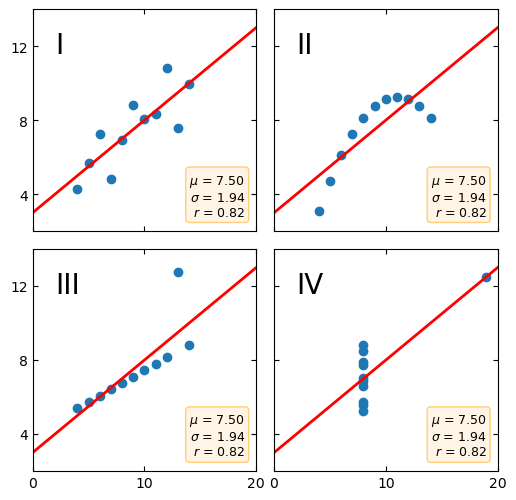

In [10]:
import matplotlib.pyplot as plt

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {'I': (x, y1),'II': (x, y2),'III': (x, y3),'IV': (x4, y4)}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

If we were to work out the MAE of III (say), then we note that the distance between each point and the regression line is, for the most part, quite small. However, there is one point (the topmost) which is substantially further away from the line than the others. While this will obviously affect the MAE, it will not faithfully reflect the error we are getting. In contrast, the MSE will. This is because we are squaring the distance and so, large distances make an even bigger impact as they are getting squared.

__Exercise:__ Compute the MAE and MSE for the above.

## Root Mean Square Error

Whereas MSE is more popular than the MAE, there is still an issue we encounter. To see this, suppose we are predicting price. By squaring our labels, we are squaring the units and will therefore end up with units such as ${£}^2$ which is less intuitive to understand. As such, we often want to 'undo' this squaring by then taking the square root (think back to standard deviation, that's all we are doing):

$$
RMSE = \sqrt{\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2.}
$$

This is the most popular of the three.

## Conclusion

We conclude on two final points. First, we note that evaluation metrics are not absolute measures of a model's suitability. In other words, there is no clear cut answer to the question, 'Is my accuracy (say) sufficient?'. This is because context matters. Suppose we are making predictions on the outcome of a sporting event and our model comes back with an 80% accuracy. In this case, 80% is probably reasonable. However, if we instead want to predict/diagnose whether a patient has a condition/disease then 80% is probably insufficient. After all, we wouldn't want to be one of those 20% who are told we are fine when in reality we have a medical condition! Of course, even this is not clear cut since some medical tests are not that accurate, or perhaps we care more about minimising false negatives than false positives (or vice versa). In any case, if we understand that there is this issue with accuracy then we can combine this hypothetical test with other tests. Moreover, there is still the question of balanced/unbalanced classes, which evaluation metric to use etc. We just used accuracy as an example, but the exact same issue exists for recall, precision, F1 etc.

Likewise, the same issues arise when considering regression problems. Suppose we are predicting a future price and this prediction is getting a RMSE of £20. If we were trying to predict house prices then this would be incredible, but if we are trying to predict the price of a pint of milk, less so. As ever, context and domain knowledge is important.

The second note is on the different methods we can use with estimators. In supervised estimators, we can also use the `.predict_proba()` method (instead of `.predict()`). This returns the probability that a new observation has each categorical label. The label with the highest probability is then returned by `model.predict()`. Another option is the `.score()` method which, for classification or regression problems, provides a score between 0 and 1 where a larger score indicates a better fit.

In unsupervised estimators, we also have a `.predict()` method which predicts labels in clustering algorithms. Another option is the `.transform()` method which takes in one argument `X_new` and spits out a new representation of the data based on the unsupervised model. Finally is the `.fit_transform()` method which for some estimators provides a more efficient way to fit and transform the same input data.